<a href="https://colab.research.google.com/github/DemitriusBR/Regressao_Linear/blob/main/Projeto_de_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIBLIOTECAS UTILIZADAS




In [ ]:
#bibliotecas importado para o projet
import pandas as pd
import seaborn as sns
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# IMPORT DO DATAFRAME

In [ ]:
#apresentando a formação do banco de dados oferecido pela empresa
df = pd.read_csv("MKT.csv")
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


# DATA CLEANING

## .describe()
Utilizei a função describe(), pois ela oferece um resumo estatístico das colunas numéricas do DataFrame, incluindo média, mediana, desvio padrão e valores mínimo e máximo. Sua inclusão no projeto ajuda a entender rapidamente a distribuição dos dados, identificar tendências e detectar outliers, facilitando a análise inicial e orientando as próximas etapas do trabalho.


In [ ]:
#Analise a variação entre os dados
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


## .info()
Utilizei a função info() do pandas para fornecer uma visão geral das características do DataFrame. Essa função exibe informações como o número de entradas, o número de colunas, os tipos de dados de cada coluna e a quantidade de valores não nulos. A inclusão de info() no projeto é fundamental para entender a estrutura dos dados, identificar colunas com dados faltantes e verificar os tipos de dados, o que facilita a limpeza e a preparação dos dados para análises posteriores.

In [ ]:
# Verificação se há dadaset apresentando a falhas na estruturação
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


## Criação de colunas
Utilizei a criação de colunas distintas para uma análise mais precisa dos dados. Ao calcular a coluna investimento, somei os valores de youtube, facebook e newspaper, permitindo uma visão do total investido em marketing. Em seguida, a coluna retorno foi criada para representar a relação entre as vendas e o investimento, expressa em porcentagem. Essa abordagem facilita a avaliação do desempenho das campanhas e ajuda a identificar quais canais de marketing estão trazendo melhores resultados. A visualização das primeiras linhas com df.head() permite verificar se as novas colunas foram inseridas corretamente e entender melhor os dados.

In [ ]:
#criação de colunas distintas para uma analise mais precisa

df["investimento"]= df["youtube"]+df["facebook"]+df["newspaper"]
df["retorno"] = df["sales"]/df["investimento"]*100

#Visualização da planilha com as novas colunas inseridas
df.head()

,youtube,facebook,newspaper,sales,investimento,retorno
0,84.72,19.20,48.96,12.60,152.88,8.241758
1,351.48,33.96,51.84,25.68,437.28,5.872667
2,135.48,20.88,46.32,14.28,202.68,7.045589
3,116.64,1.80,36.00,11.52,154.44,7.459207
4,318.72,24.00,0.36,20.88,343.08,6.086044


# EDA

## pairplot()



Apliquei a função pairplot() para realizar uma análise de correlação entre as colunas do DataFrame. Essa visualização permite observar as relações entre todas as variáveis numéricas, exibindo gráficos de dispersão para pares de variáveis e distribuições univariadas. Com isso, é possível identificar padrões, tendências e correlações entre os dados de forma clara e intuitiva. Essa análise é fundamental para entender como as variáveis interagem entre si e pode orientar decisões futuras no projeto.

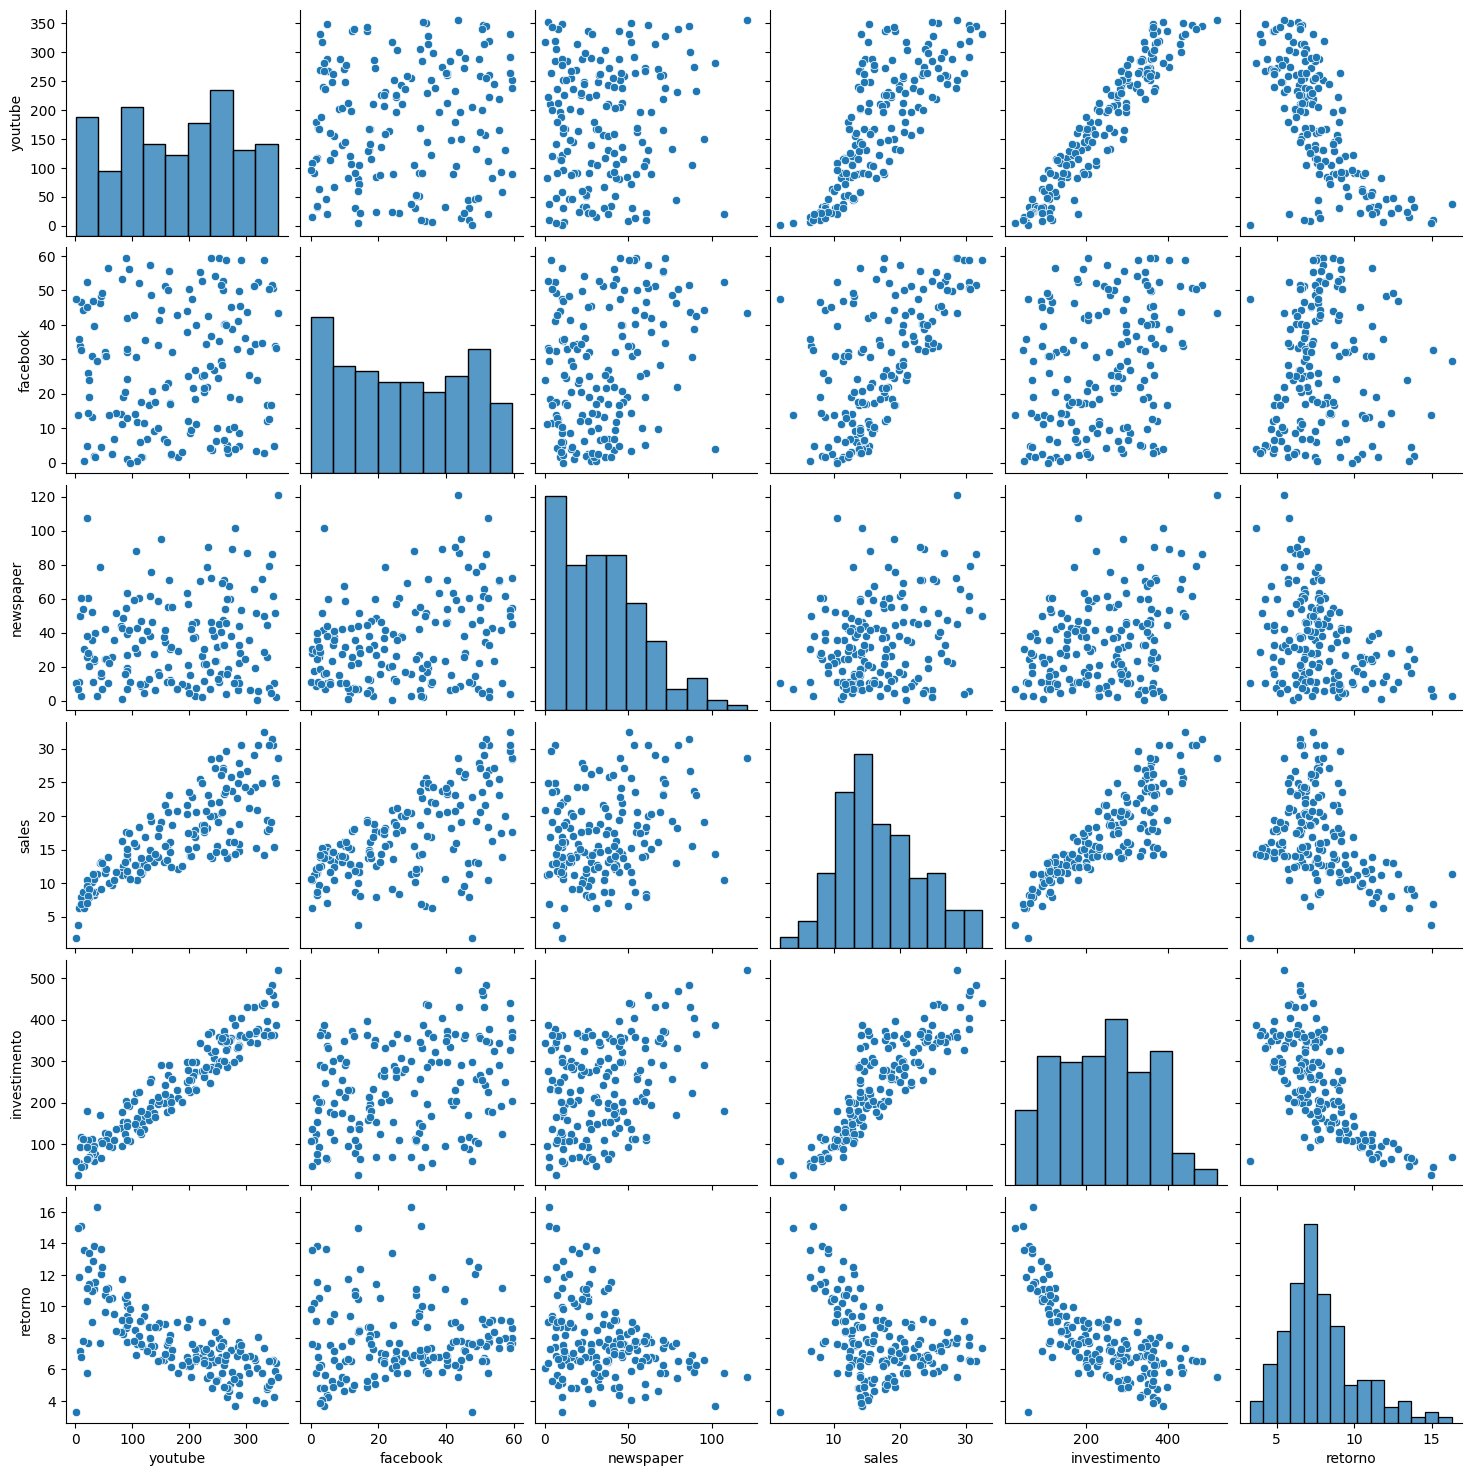

In [ ]:
#Analise para verificar a corelação entre as colunas
sns.pairplot(df)

Em seguida, utilizei a função novamente, desta vez especificando as colunas que desejava destacar para a análise, filtrando apenas as informações essenciais

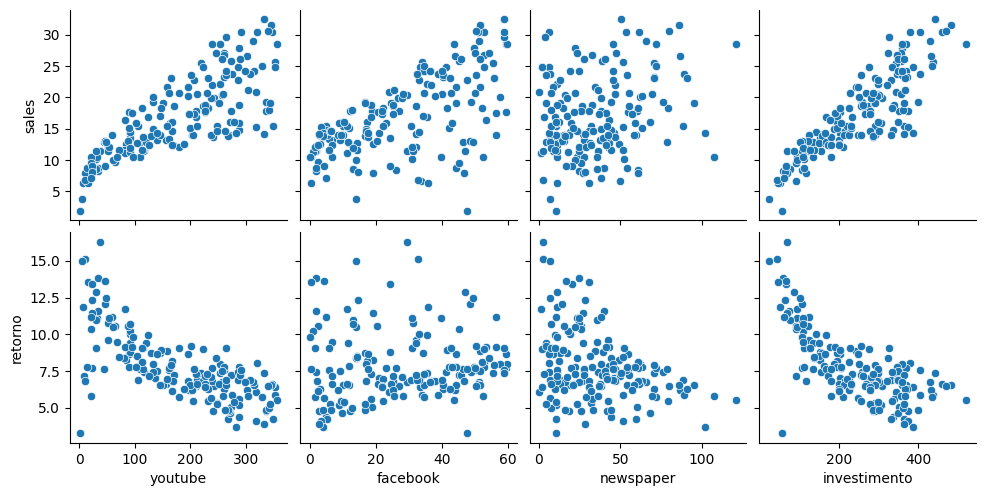

In [ ]:
#Analise detalhada das variaveis
sns.pairplot(df, x_vars =["youtube","facebook","newspaper","investimento"], y_vars = ["sales","retorno"])

## heatmap()

Apliquei a função heatmap() para visualizar a correlação entre as colunas do DataFrame. Esse mapa de calor exibe uma matriz de correlação, onde os valores são representados por cores, facilitando a identificação de relações fortes e fracas entre as variáveis. A opção annot=True adiciona os valores numéricos à matriz, permitindo uma interpretação mais precisa. Essa visualização é crucial para entender como as variáveis estão interligadas, auxiliando na identificação de padrões que podem influenciar as decisões no projeto.

<Axes: >

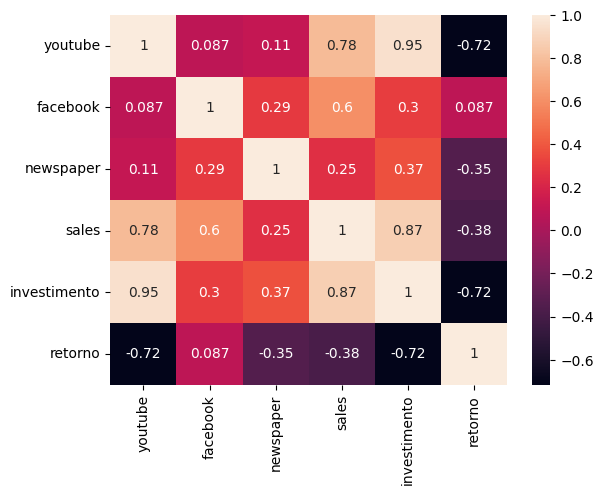

In [ ]:
#Analise para verificar qual a mair corelação entre os resultado

sns.heatmap(df.corr(), annot=True)

# TREINAMENTO E MODELAGEM

## Treinamento do modelo

Defini as variáveis para o treinamento ao separar os dados em atributos (X) e rótulos (y). X inclui as colunas relacionadas ao investimento em marketing, enquanto y contém as colunas de vendas e retorno. Em seguida, utilizei a função train_test_split() para dividir os dados em conjuntos de treinamento e teste, com 20% dos dados reservados para teste e um parâmetro random_state definido para garantir a reprodutibilidade. Essa separação é essencial para avaliar o desempenho do modelo de forma eficaz, garantindo que ele possa generalizar bem para dados não vistos.

In [ ]:
#Definindo a variaveis de para o treinamento
X = df[["youtube","newspaper","facebook","investimento"]]
y = df[["sales", "retorno"]]
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.2, random_state=40)


## Modelo de Regressão Linear

Realizei as previsões utilizando o modelo de regressão linear (LinearRegression). Após ajustar o modelo aos dados de treinamento com o método fit(), utilizei predict() para gerar previsões com o conjunto de teste. Para avaliar a precisão das previsões, calculei o coeficiente de determinação usando r2_score(), que mede a proporção da variância nos dados de saída que é previsível a partir das variáveis de entrada. O valor de R2 impresso fornece uma indicação clara da qualidade do modelo, ajudando a entender seu desempenho nas previsões.

In [ ]:
#Realizando as previsões
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
# Verificando a precisão das previsões
r = r2_score(y_test, y_pred)
print("valor de r:", r)

# CONCLUSÃO


### RETORNO ESPERADO



Defini as premissas para realizar previsões com base no investimento em marketing. O código solicita ao usuário os valores investidos em YouTube, Facebook e jornal, calculando o total de investimento. Em seguida, criei uma entrada para o modelo com esses dados. Utilizei o modelo de regressão linear para prever o valor de vendas e a porcentagem de retorno com base no investimento informado. As informações são exibidas de forma organizada, mostrando o valor total investido e a previsão resultante, facilitando a interpretação dos resultados. Essa abordagem permite uma interação prática com o modelo e a aplicação das análises realizadas.

In [ ]:
#definindo premissas
print("-"*102)
print("-"*12, "preveja o valor da venda e a porcentagem convertida a partir do investimento","-"*12)
print("-"*102)
youtube = float(input("Qual o valor investido no Youtube R$ "))
facebook = float(input("Qual o valor investido no Facebook R$ "))
newspaper = float(input("Qual o valor investido no Jornal R$ "))
investimento = youtube+facebook+newspaper
entrada = [[youtube,facebook,newspaper,investimento]]
previsão = lm.predict(entrada)[0]
print()
print("-"*102)
print()
print("valor total investido foi de R$", investimento)
print()
print("-"*102)
print()
print("A previsão é que seja: valor / porcentagem")
print(" "*20, previsão)
print("-"*102)
print()



------------------------------------------------------------------------------------------------------
------------ preveja o valor da venda e a porcentagem convertida a partir do investimento ------------
------------------------------------------------------------------------------------------------------
Qual o valor investido no Youtube R$ 60
Qual o valor investido no Facebook R$ 40
Qual o valor investido no Jornal R$ 100

------------------------------------------------------------------------------------------------------

valor total investido foi de R$ 200.0

------------------------------------------------------------------------------------------------------

A previsão é que seja: valor / porcentagem
                     [26.56331744 12.03891669]
------------------------------------------------------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
